In [98]:
# Name - Bbiswabasu Roy
# Roll - 19EC30008
# Assignment - 3
# No specific compilation flag required

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv('Project3.csv')

# one hot encoding for categorical values    
data['Education_0'] = (data['Education']==0).astype(int)
data['Education_1'] = (data['Education']==1).astype(int)
data['Education_2'] = (data['Education']==2).astype(int)
data['Education_3'] = (data['Education']==3).astype(int)
data['Occupation_0'] = (data['Occupation']==0).astype(int)
data['Occupation_1'] = (data['Occupation']==1).astype(int)
data['Occupation_2'] = (data['Occupation']==2).astype(int)
data['Settlement_size_0'] = (data['Settlement size']==0).astype(int)
data['Settlement_size_1'] = (data['Settlement size']==1).astype(int)
data['Settlement_size_2'] = (data['Settlement size']==2).astype(int)

# remove original categorical column
data=data.drop(['ID','Education','Occupation','Settlement size'],axis=1)

# normalize each column
data = (data-data.min())/(data.max()-data.min())
data = data.values

In [101]:
def compute_centroids_change(s1, s2):
    centroids_change = 0
    for i in range(0, len(s1)):
        dist = np.linalg.norm(s1[i]-s2[i])
        centroids_change += dist*dist
    centroids_change /= len(s1)
    centroids_change = np.sqrt(centroids_change)
    return centroids_change


In [102]:
def find_cluster(data, k):
    eps = 1e-3
    cluster_id = [-1]*len(data)
    centroid_indices = np.floor(np.random.rand(k)*(len(data)-1)) # choose centroids to be some random data points
    centroids = [0]*k
    for i in range(0, k):
        centroids[i] = data[int(centroid_indices[i])]

    while(1):
        centroids_prev = centroids
        centroids = [0]*k # centroids after this iteration
        bin_size = [0]*k # size of bins for each cluster
        for i in range(0, len(data)):
            min_dist = 1e18
            best_cluster = -1
            for j in range(0, k):
                dist = np.linalg.norm(data[i]-centroids_prev[j])
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = j
            cluster_id[i] = best_cluster
            centroids[best_cluster] += data[i] # adding up data points of this cluster to compute mean position
            bin_size[best_cluster] += 1

        for i in range(0, k):
            if bin_size[i]==0:
                centroids[i]=centroids_prev[i]
            else:
                centroids[i] = centroids[i]/bin_size[i] # update each centroid to be mean of points in that bin
            
        centroids_change = compute_centroids_change(centroids_prev, centroids)
        # print("Average change in centroid values = ",centroids_change)
        if centroids_change < eps:
            break
    return [cluster_id,centroids]

In [103]:
def compute_scatter(cluster_id, centroids, data):
    intra_avg, intra_cnt = 0, 0
    inter_avg = 0
    for i in range(0, k):
        for j in range(0, k):
            inter_avg += np.linalg.norm(centroids[i]-centroids[j])

    for i in range(0, len(data)):
        intra_avg += np.linalg.norm(data[i]-centroids[cluster_id[i]])

    intra_avg /= len(data)
    inter_avg /= k*k
    return intra_avg/inter_avg


In [104]:
scatter = []
for k in range(1, 25):
    [cluster_id, centroids] = find_cluster(data, k)
    cur_scatter = compute_scatter(cluster_id, centroids, data)
    scatter.append(cur_scatter)
    print("Scatter for ", k, " clusters = ", cur_scatter)


<ipython-input-103-8832d2fd692b>:13: RuntimeWarning: divide by zero encountered in double_scalars
  return intra_avg/inter_avg


Scatter for  1  clusters =  inf
Scatter for  2  clusters =  1.663739577244387
Scatter for  3  clusters =  1.132172653538645
Scatter for  4  clusters =  0.9097989832556238
Scatter for  5  clusters =  0.8664038899043369
Scatter for  6  clusters =  0.7268266910597019
Scatter for  7  clusters =  0.6783494591470302
Scatter for  8  clusters =  0.6015437133206312
Scatter for  9  clusters =  0.5080933541646909
Scatter for  10  clusters =  0.47485405309317325
Scatter for  11  clusters =  0.45852358148933703
Scatter for  12  clusters =  0.49069969097099975
Scatter for  13  clusters =  0.46261567024356187
Scatter for  14  clusters =  0.37774611648759715
Scatter for  15  clusters =  0.32711518006795604
Scatter for  16  clusters =  0.35289603729236274
Scatter for  17  clusters =  0.37802368924502405
Scatter for  18  clusters =  0.3170662713272902
Scatter for  19  clusters =  0.31149967003369045
Scatter for  20  clusters =  0.2503356795205767
Scatter for  21  clusters =  0.23716952396238158
Scatter 

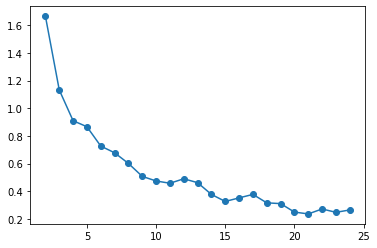

In [106]:
plt.plot(np.arange(1,25),scatter,'o-')

From the above plot, __k = 15__ clusters seems to give low enough scatter index and hence chosen as optimal number of cluster

In [107]:
[cluster_id, centroids] = find_cluster(data, 15)

In [108]:
cluster_id=str(cluster_id)
cluster_id = cluster_id[1:len(cluster_id)-1]
cluster_id = cluster_id.replace(', ', '\n')
f = open("19EC30008_P3.out","w")
f.write(cluster_id)
f.close()